In [108]:
# Importacion de Librerias

import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
# Carga de datos

data = pd.read_csv("advertising.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


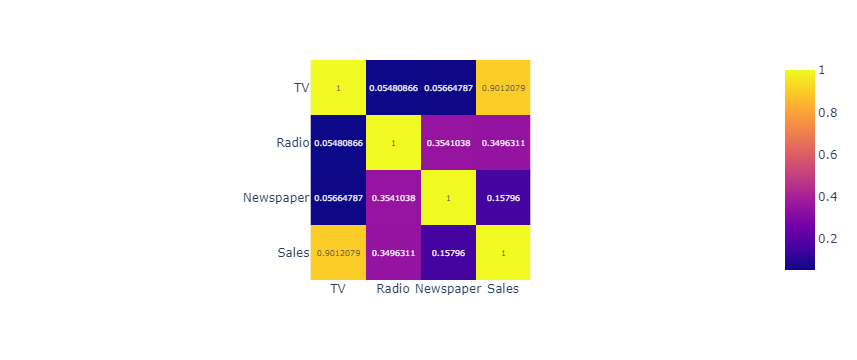

In [115]:
corr_matrix= pd.DataFrame(data.corr())

# Visualizar la matriz de correlación
HeatMap = px.imshow(corr_matrix, text_auto=True)
HeatMap.show()

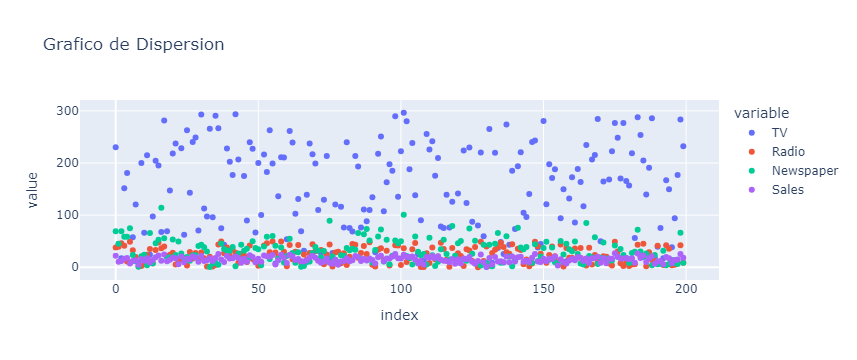

In [137]:
fig = px.scatter(data, y=data.columns,
                title='Grafico de Dispersion')
fig.show()

In [138]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [139]:
Modelo = LinearRegression()
Modelo.fit(X_train, y_train)

LinearRegression()

In [140]:
y_pred = Modelo.predict(X_test)

# Cálculo de métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
Var_Explicada = Modelo.score(X_test, y_test)

print('Error absoluto medio:', mae)
print('Error cuadratico medio:', mse)
print('Puntaje R2:', r2)
print('Puntaje de Varianza Explicada:', Var_Explicada)


Error absoluto medio: 1.119994071336177
Error cuadratico medio: 2.404067444711887
Puntaje R2: 0.9115647723992758
Puntaje de Varianza Explicada: 0.9115647723992758


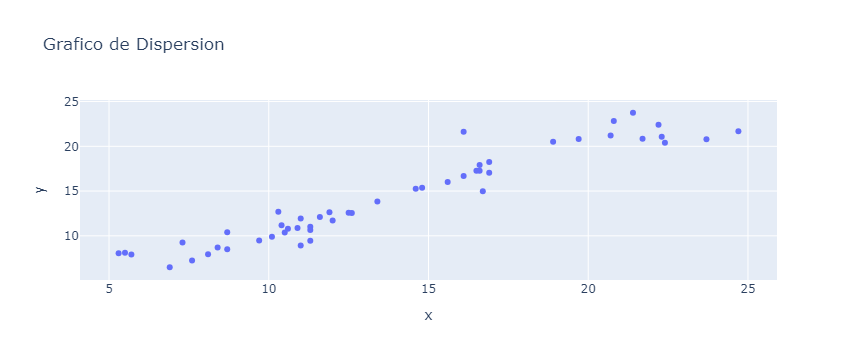

In [144]:
# Comparacion grafica entre el conjunto de prueba y lo predicho

fig_Prueba = px.scatter(x=y_test , y=y_pred,
                title='Grafico de Dispersion')
fig_Prueba.show()

El maximo error porcentual es:  52.07606503811961


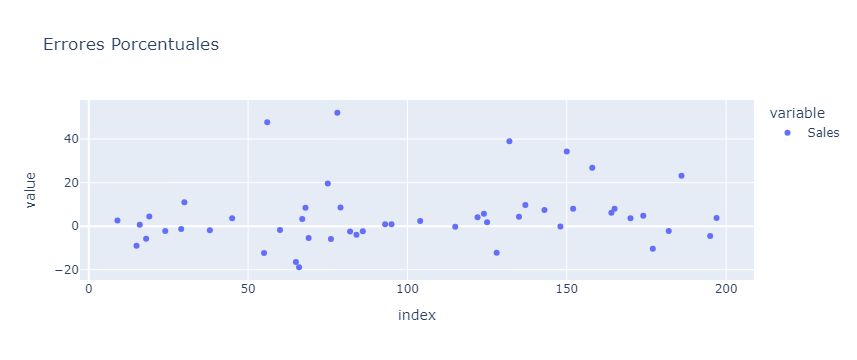

In [146]:
Errores = (y_pred - y_test) / y_test * 100

print("El maximo error porcentual es: ", np.max(Errores))

Err_plot = px.scatter(Errores,
                title='Errores Porcentuales')
Err_plot.show()